In [7]:
import csv
import pandas as pd
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import pickle
import matplotlib.pyplot as plt
import matplotlib.ticker as MT
import matplotlib.lines as L
import matplotlib.cm as CM
import matplotlib.colors as C
import matplotlib.patches as PA
import matplotlib
from matplotlib import cm
from tol_colors import tol_cmap
import glob
plt.close('all')
plt.style.use('default')
plt.rc('font', family='serif')
#plt.rc('text', usetex=True)
plt.rcParams.update({'font.size': 14})

start = 0.0
stop = 1.0
number_of_lines= 10
cm_subsection = np.linspace(start, stop, number_of_lines) 
colors = [ cm.hsv(x) for x in cm_subsection ]
cmap = tol_cmap('rainbow_discrete', 10)
colors = cmap(1.0)
colors = [ cmap(x) for x in cm_subsection ]
base_dir = '../logs/twitter/'
LEGEND_FONT_SIZE = 28
AXIS_FONT_SIZE = 28
TICKS_FONT_SIZE = 26
MARKER_SIZE = 10
LINE_WIDTH = 3.0
TITLE_SIZE= 32

In [8]:
results = pickle.load(open(base_dir + 'feature_exp/results.pkl','rb'))
agents = np.array(results['agent_list'])
feature_expectations = np.array(results['feature_list'])
agent_features_expectations = results['feature_dict']
feature_labels = np.array(['Popularity', 'N. Retweets', 'Retweet Time'])
features_idx = [[0,1,2]]
num_agents=agents.shape[0]

# Load precomputed feature expectations and run fe clustering (Figure)
## Prerequisite: Execute run_fe_experiment_twitter.py¶


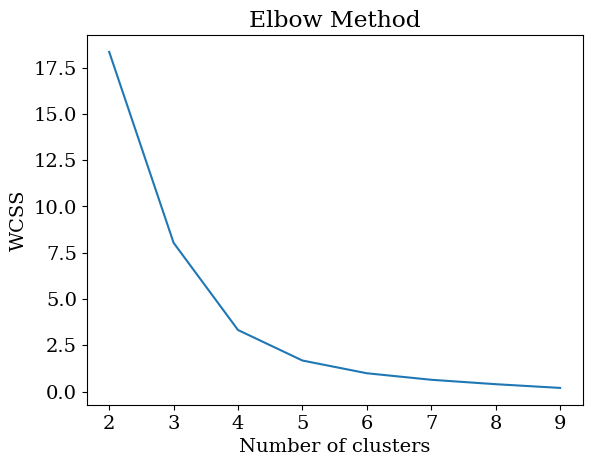

In [9]:
X = feature_expectations[:num_agents,features_idx[0]]
wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
num_agents = 16
num_clusters = 3
for features in [features_idx[0]]:
    X = feature_expectations[:num_agents,features]
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    print("Agents:")
    print(agents[:num_agents])
    print("Features:")
    print(feature_labels[features])
    print("Assignment")
    print(kmeans.labels_)
    print()

Agents:
['Bob' 'Carol' 'Chuck' 'Craig' 'Dan' 'Erin' 'Grace' 'Frank' 'Heidi' 'Ivan'
 'Mallory' 'Mike' 'Olivia' 'Niaj']
Features:
['Popularity' 'N. Retweets' 'Retweet Time']
Assignment
[1 0 1 1 1 1 1 0 1 1 1 2 0 0]



# Run fe clustering with 3 Clusters (Table 5)
## Prerequisite: Execute run_fe_experiment_twitter.py¶


In [11]:
num_agents = 14
num_clusters = 3
for features in [features_idx[0]]:
    X = feature_expectations[:num_agents,features]
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    print("Features:")
    print(feature_labels[features])
    print("Assignment")
    assignment = kmeans.labels_
    for i in range(num_clusters):
        indices = assignment == i
        print(agents[indices].tolist())

Features:
['Popularity' 'N. Retweets' 'Retweet Time']
Assignment
['Carol', 'Frank', 'Olivia', 'Niaj']
['Bob', 'Chuck', 'Craig', 'Dan', 'Erin', 'Grace', 'Heidi', 'Ivan', 'Mallory']
['Mike']


# Run IRL on the 3 Clusters identyfied by FE clustering (Table 5)
## Prerequisites: 
### Execute run_fe_experiment_twitter.py to compute feature expectations
### Execute previous cell to perform clustering on feature expectations
### Record the clustering on the list of assignments in run_irl_twitter_fe_clusters.py  (fe_clustering variable)
### Execute run_irl_twitter_fe_clusters.py to per IRL on the aggregated trajectories

In [12]:
results_clustering = pickle.load(open(base_dir + 'results_clustering.pkl','rb'))
settings = results_clustering['settings']
#Change if you perform different clustering
clustering = [['Carol', 'Frank', 'Olivia', 'Niaj'],
              ['Bob', 'Chuck', 'Craig', 'Dan', 'Erin', 'Grace', 'Heidi', 'Ivan', 'Mallory'],
              ['Mike']]

features_idx = [[0,1,2]]
num_agents=agents.shape[0]
for setting in settings:
    print("Setting:" + setting)
    data = results_clustering[setting] 
    for i, cluster in enumerate(clustering):
        print("\t Cluster " + str(i+1))
        for j in range(len(data[i][0])):
            print("\t \t Weights:" + str(data[i][0][j]))
    print()

Setting:pgirl
	 Cluster 1
	 	 Weights:[0.43878763 0.43031502 0.13089735]
	 Cluster 2
	 	 Weights:[0.7498123  0.21422259 0.03596511]
	 Cluster 3
	 	 Weights:[0.48050937 0.43694819 0.08254244]

Setting:ra_pgirl_diag
	 Cluster 1
	 	 Weights:[0.71221165 0.27327563 0.01451273]
	 Cluster 2
	 	 Weights:[0.73140894 0.21494894 0.05364211]
	 Cluster 3
	 	 Weights:[0.48832901 0.4390988  0.07257219]

Setting:ra_pgirl_cov_estimation
	 Cluster 1
	 	 Weights:[0.89759765 0.04577646 0.0566259 ]
	 Cluster 2
	 	 Weights:[0.74980896 0.21422125 0.0359698 ]
	 Cluster 3
	 	 Weights:[0.48052012 0.43695506 0.08252482]

